In [213]:
import numpy as np
def normal(data):
  return np.log(1+data)

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [215]:
data_train = pd.read_csv('/content/drive/MyDrive/Colab/du_doan_gia/train.csv')
print(data_train.tail(10))

data_X_test = pd.read_csv('/content/drive/MyDrive/Colab/du_doan_gia/test.csv')
print(data_X_test.head(10))

data_Y_test = pd.read_csv('/content/drive/MyDrive/Colab/du_doan_gia/sample_submission.csv')
print(data_Y_test.head(10))

        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
1450  1451          90       RL  ...        WD         Normal    136000
1451  1452          20       RL  ...       New        Partial    287090
1452  1453         180       RM  ...        WD         Normal    145000
1453  1454          20       RL  ...        WD        Abnorml     84500
1454  1455          20       FV  ...        WD         Normal    185000
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[10 rows x 81 columns]
     Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD 

In [216]:
# import matplotlib.pyplot as plt
# x = data_train["MSSubClass"]
# y = data_train[['SalePrice']]
# plt.plot(x,y,'go')

In [217]:
# X_train = X_train.replace([np.inf, -np.inf], np.nan)
data_train = data_train.fillna(0)

# X_test = X_train.replace([np.inf, -np.inf], np.nan)
data_X_test = data_X_test.fillna(0)
data_Y_test = data_Y_test.fillna(0)

In [218]:
columns = [
      'LotFrontage',
      'YearBuilt',
      'YearRemodAdd',
      'BsmtFinSF1',
      'BsmtUnfSF',
      'TotalBsmtSF',
      '1stFlrSF',
      '2ndFlrSF',
      'GrLivArea',
      'GarageArea'
]

In [219]:
X_train = np.array(data_train[columns])

Y_train = np.array(data_train['SalePrice'])

print(X_train)
print(Y_train)

[[  65. 2003. 2003. ...  854. 1710.  548.]
 [  80. 1976. 1976. ...    0. 1262.  460.]
 [  68. 2001. 2002. ...  866. 1786.  608.]
 ...
 [  66. 1941. 2006. ... 1152. 2340.  252.]
 [  68. 1950. 1996. ...    0. 1078.  240.]
 [  75. 1965. 1965. ...    0. 1256.  276.]]
[208500 181500 223500 ... 266500 142125 147500]


In [220]:
X_test = np.array(data_X_test[columns])

print(X_test)

Y_test = np.array(data_Y_test['SalePrice'])
print(Y_test)

[[  80. 1961. 1961. ...    0.  896.  730.]
 [  81. 1958. 1958. ...    0. 1329.  312.]
 [  74. 1997. 1998. ...  701. 1629.  482.]
 ...
 [ 160. 1960. 1996. ...    0. 1224.  576.]
 [  62. 1992. 1992. ...    0.  970.    0.]
 [  74. 1993. 1994. ... 1004. 2000.  650.]]
[169277.0524984  187758.39398877 183583.68356955 ... 219222.42340006
 184924.279659   187741.86665748]


In [221]:
X_test.shape

(1459, 10)

In [222]:
# X_train = normal(X_train)
# Y_train = normal(Y_train)
# X_test = normal(X_test)
# Y_test = normal(Y_test)

In [223]:
from sklearn import datasets, linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

regr = linear_model.LinearRegression()
# regr = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(5, 2), random_state=1)

In [224]:
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

In [225]:
print(Y_test)
print(Y_pred)

[169277.0524984  187758.39398877 183583.68356955 ... 219222.42340006
 184924.279659   187741.86665748]
[129563.38105568 153537.75878422 211122.77904031 ... 188341.23455425
 123582.91986685 244012.09115608]


In [226]:
print('Mean squared log error: %.2f'
      % mean_squared_log_error(Y_test, Y_pred))

Mean squared log error: 0.16


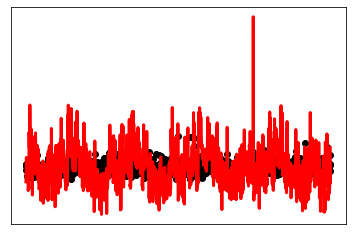

In [227]:
x = np.array(data_X_test['Id'])
plt.scatter(x, Y_test,  color='black')
plt.plot(x, Y_pred, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()